In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
carbon=np.loadtxt('carbon.csv',delimiter=',')*[67.87, 67.87, 67.87]*1.1 #1.1 makes up for density

In [3]:
carbon=carbon-[np.min(carbon[:,0]),np.min(carbon[:,1]),np.min(carbon[:,2])]

In [4]:
carbon = np.delete(carbon, (carbon[:,0]>50), axis=0)
carbon = np.delete(carbon, (carbon[:,1]>25), axis=0)

In [5]:
noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
SiN=carbon+(noise-0.5)*0.1
for i in range(0,1): #5 for 30, 9 for 50, 15 for 80
        noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
        carbon2=carbon+(noise-0.5)*0.1
        carbon2[:,1]=np.flipud(carbon2[:,1])
        carbon2=carbon2+[0,0,np.max(carbon2[:,2])]
        SiN=np.concatenate([SiN,carbon2])
        print(i)

0


In [6]:
element_random=np.random.random_sample([SiN.shape[0],1])
elements=14*np.ones([SiN.shape[0],1])
elements=elements.astype('object')
elements[element_random>3/7]='N'
elements[element_random<=3/7]='Si'

SiN=np.concatenate([elements,SiN],axis=1)

In [7]:
Au=np.loadtxt('particle.csv',delimiter=',')
Au=Au-[np.min(Au[:,0]),np.min(Au[:,1]),np.min(Au[:,2])]

In [8]:
np.max(Au[:,2])

16.03

In [9]:
cellmax=np.max(SiN[:,3])
print(cellmax)

76.2552214902912


In [10]:
Au=Au+[0,0,cellmax]
np.max(Au[:,2])

92.2852214902912

In [11]:
Au.shape

(676, 3)

In [12]:
elements=np.ones([Au.shape[0],1])
elements=elements.astype('object')
elements[0:170]='Bi'
elements[170:170+168]='Cu'
elements[170+168:170+168*2]='O'
elements[170+168*2:170*2+168*2]='S'

Au=np.concatenate([elements,Au],axis=1)

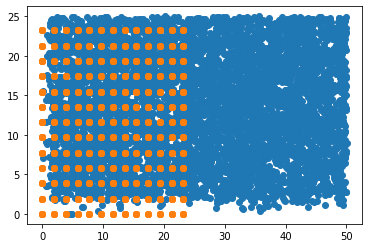

In [13]:
fig, ax = plt.subplots()
ax.scatter(SiN[:,1], SiN[:,2])
ax.scatter(Au[:,1], Au[:,2])
plt.show()

In [14]:
stack=np.concatenate([SiN,Au])

In [15]:
760*5e-7/62.36/293*1000*1e-20*6.02*1e23

0.12520058583103283

In [16]:
#0.034 atoms/A^2
atoms_gas=int(0.125*50*25)

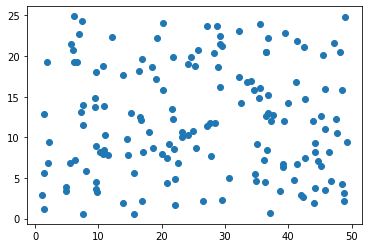

In [17]:
cellmax1=np.max(stack[:,3])
gx=np.random.uniform(0,50,atoms_gas)
gy=np.random.uniform(0,25,atoms_gas)
gz=0.1*np.random.uniform(0,50,atoms_gas)+cellmax1

gas=np.zeros([atoms_gas,3])
gas[:,0]=gx
gas[:,1]=gy
gas[:,2]=gz

fig,ax=plt.subplots()
ax.scatter(gas[:,0], gas[:,1])
plt.show()

In [18]:
elements=np.ones([gas.shape[0],1])
elements=elements.astype('object')
elements[elements>3/7]='Ar'

gas=np.concatenate([elements,gas],axis=1)

In [19]:
stack=np.concatenate([stack,gas])

In [20]:
cellmax2=np.max(stack[:,3])
print(cellmax2)

97.07366707273911


In [21]:
noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
SiN2=carbon+(noise-0.5)*0.1
for i in range(0,1): #5 for 30, 9 for 50, 15 for 80
        noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
        carbon2=carbon+(noise-0.5)*0.1
        carbon2[:,1]=np.flipud(carbon2[:,1])
        carbon2=carbon2+[0,0,np.max(carbon2[:,2])]
        SiN2=np.concatenate([SiN2,carbon2])
        print(i)

0


In [22]:
SiN2=SiN2+[0,0,cellmax2]

In [23]:
element_random=np.random.random_sample([SiN2.shape[0],1])
elements=14*np.ones([SiN2.shape[0],1])
elements=elements.astype('object')
elements[element_random>3/7]='N'
elements[element_random<=3/7]='Si'

SiN2=np.concatenate([elements,SiN2],axis=1)

In [24]:
stack=np.concatenate([stack,SiN2])

In [25]:
print(np.max(stack[:,1]), np.max(stack[:,2]), np.max(stack[:,3]))

50.02452104660963 25.02914006765328 173.4744317586915


In [26]:
NP_only=stack[np.logical_or(np.logical_or(np.logical_or(stack[:,0]=='Bi', stack[:,0]=='Cu' ), stack[:,0] == 'O'), stack[:,0] == 'S')]
np.savetxt("Chi_only.xyz", NP_only, fmt='%s %.2f %.2f %.2f',delimiter=" ")
print(NP_only.shape)

(676, 4)


In [27]:
np.savetxt("stack.xyz", stack, fmt='%s %.2f %.2f %.2f',delimiter=" ")
print(stack.shape)

(13352, 4)


In [28]:
NP_only=stack[np.logical_or(np.logical_or(np.logical_or(np.logical_or(stack[:,0]=='Bi', stack[:,0]=='Cu' ), stack[:,0] == 'O'), stack[:,0] == 'S'),stack[:,0] == 'Ar')]
np.savetxt("Chi_Ar.xyz", NP_only, fmt='%s %.2f %.2f %.2f',delimiter=" ")
print(NP_only.shape)

(832, 4)


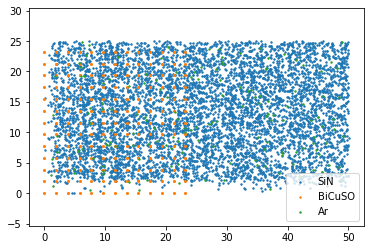

In [29]:
fig, ax = plt.subplots()
ax.scatter(SiN[:,1], SiN[:,2],s=2, label='SiN')
ax.scatter(Au[:,1], Au[:,2],s=2, label='BiCuSO')
ax.scatter(gas[:,1], gas[:,2], s=2, label='Ar')
ax.axis('equal') 
ax.legend()
plt.show()

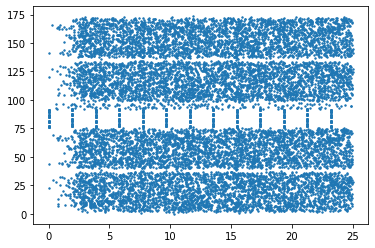

In [30]:
fig, ax = plt.subplots()
ax.scatter(stack[:,2], stack[:,3],s=2, label='SiN')
plt.show()

In [31]:
print(np.max(stack[:,1]),np.max(stack[:,2]),np.max(stack[:,3]))

50.02452104660963 25.02914006765328 173.4744317586915


In [32]:
173/2

86.5